In [24]:
import pandas as pd
df=pd.read_csv("books_with_categories1.csv")

In [25]:
df[df["simple_category"].isna()].shape

(0, 14)

In [26]:
df.shape

(5197, 14)

In [ ]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
classifier("I love this!")


Device set to use cpu
c:\Users\dk035\OneDrive\Desktop\book-reccomender\.venv\Lib\site-packages\transformers\pipelines\text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'anger', 'score': 0.004419783595949411},
  {'label': 'disgust', 'score': 0.0016119893407449126},
  {'label': 'fear', 'score': 0.0004138524236623198},
  {'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'neutral', 'score': 0.005764586851000786},
  {'label': 'sadness', 'score': 0.002092392183840275},
  {'label': 'surprise', 'score': 0.008528688922524452}]]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Exception ignored in: <function tqdm.__del__ at 0x0000023E688ABF60>
Traceback (most recent call last):
  File "c:\Users\dk035\OneDrive\Desktop\book-reccomender\.venv\Lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "c:\Users\dk035\OneDrive\Desktop\book-reccomender\.venv\Lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm' object has no attribute 'disp'


In [28]:
sentences = ["I joy this!"]

model_outputs = classifier(sentences)

# Print results vertically
for output in model_outputs[0]:
  print(f"{output['label']}: {output['score']}")

anger: 0.001385468989610672
disgust: 0.0006546105723828077
fear: 0.00028669502353295684
joy: 0.9884076714515686
neutral: 0.0014603850431740284
sadness: 0.0023763319477438927
surprise: 0.005428897682577372


In [29]:
df["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [30]:
sentences=df["description"][0]
classifier(sentences)


[[{'label': 'anger', 'score': 0.003935146611183882},
  {'label': 'disgust', 'score': 0.019100677222013474},
  {'label': 'fear', 'score': 0.6548405885696411},
  {'label': 'joy', 'score': 0.01516144908964634},
  {'label': 'neutral', 'score': 0.16985228657722473},
  {'label': 'sadness', 'score': 0.11640921980142593},
  {'label': 'surprise', 'score': 0.02070065587759018}]]

In [31]:
df["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [32]:
classifier(df["description"][0].split("."))

[[{'label': 'anger', 'score': 0.009156366810202599},
  {'label': 'disgust', 'score': 0.0026284765917807817},
  {'label': 'fear', 'score': 0.06816228479146957},
  {'label': 'joy', 'score': 0.04794260859489441},
  {'label': 'neutral', 'score': 0.14038600027561188},
  {'label': 'sadness', 'score': 0.002122163539752364},
  {'label': 'surprise', 'score': 0.7296020984649658}],
 [{'label': 'anger', 'score': 0.04047830402851105},
  {'label': 'disgust', 'score': 0.27359163761138916},
  {'label': 'fear', 'score': 0.006879047024995089},
  {'label': 'joy', 'score': 0.10908330976963043},
  {'label': 'neutral', 'score': 0.44937002658843994},
  {'label': 'sadness', 'score': 0.09362746775150299},
  {'label': 'surprise', 'score': 0.026970159262418747}],
 [{'label': 'anger', 'score': 0.011031901463866234},
  {'label': 'disgust', 'score': 0.04342271760106087},
  {'label': 'fear', 'score': 0.0140841044485569},
  {'label': 'joy', 'score': 0.014211472123861313},
  {'label': 'neutral', 'score': 0.64621597528

In [33]:
sentences=df["description"][0].split(".")
predictions=classifier(sentences)
predictions[0]


[{'label': 'anger', 'score': 0.009156366810202599},
 {'label': 'disgust', 'score': 0.0026284765917807817},
 {'label': 'fear', 'score': 0.06816228479146957},
 {'label': 'joy', 'score': 0.04794260859489441},
 {'label': 'neutral', 'score': 0.14038600027561188},
 {'label': 'sadness', 'score': 0.002122163539752364},
 {'label': 'surprise', 'score': 0.7296020984649658}]

In [34]:
sentences[3]

' Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist'

In [35]:
predictions[3]

[{'label': 'anger', 'score': 0.032191041857004166},
 {'label': 'disgust', 'score': 0.008431818336248398},
 {'label': 'fear', 'score': 0.9281681180000305},
 {'label': 'joy', 'score': 0.0010455837473273277},
 {'label': 'neutral', 'score': 0.01280867587774992},
 {'label': 'sadness', 'score': 0.008756861090660095},
 {'label': 'surprise', 'score': 0.008597906678915024}]

In [36]:
predictions

[[{'label': 'anger', 'score': 0.009156366810202599},
  {'label': 'disgust', 'score': 0.0026284765917807817},
  {'label': 'fear', 'score': 0.06816228479146957},
  {'label': 'joy', 'score': 0.04794260859489441},
  {'label': 'neutral', 'score': 0.14038600027561188},
  {'label': 'sadness', 'score': 0.002122163539752364},
  {'label': 'surprise', 'score': 0.7296020984649658}],
 [{'label': 'anger', 'score': 0.04047830402851105},
  {'label': 'disgust', 'score': 0.27359163761138916},
  {'label': 'fear', 'score': 0.006879047024995089},
  {'label': 'joy', 'score': 0.10908330976963043},
  {'label': 'neutral', 'score': 0.44937002658843994},
  {'label': 'sadness', 'score': 0.09362746775150299},
  {'label': 'surprise', 'score': 0.026970159262418747}],
 [{'label': 'anger', 'score': 0.011031901463866234},
  {'label': 'disgust', 'score': 0.04342271760106087},
  {'label': 'fear', 'score': 0.0140841044485569},
  {'label': 'joy', 'score': 0.014211472123861313},
  {'label': 'neutral', 'score': 0.64621597528

In [37]:
sorted(predictions[0], key=lambda x: x["label"])

[{'label': 'anger', 'score': 0.009156366810202599},
 {'label': 'disgust', 'score': 0.0026284765917807817},
 {'label': 'fear', 'score': 0.06816228479146957},
 {'label': 'joy', 'score': 0.04794260859489441},
 {'label': 'neutral', 'score': 0.14038600027561188},
 {'label': 'sadness', 'score': 0.002122163539752364},
 {'label': 'surprise', 'score': 0.7296020984649658}]

In [38]:
import numpy as np
emotion_labels=["anger","disgust","fear","joy","sadness","surprise","neutral"]
isbn=[]
emotion_scores={label:[] for label in emotion_labels}
def calculate_max_emotion_scores(predictions):
    per_emotion_scores={label:[] for label in emotion_labels}
    for prediction in predictions:
        sorted_predictions = sorted(prediction, key=lambda x: x["label"])
        for index, label in enumerate(emotion_labels):
               per_emotion_scores[label].append(sorted_predictions[index]["score"])
    return {label: np.max(scores) for label, scores in per_emotion_scores.items()}



In [39]:
for i in range(10):
    isbn.append(df["isbn13"][i])
    sentences = df["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
            emotion_scores[label].append(max_scores[label])


In [40]:
emotion_scores

{'anger': [np.float64(0.06413359194993973),
  np.float64(0.6126202344894409),
  np.float64(0.06413359194993973),
  np.float64(0.35148438811302185),
  np.float64(0.08141235262155533),
  np.float64(0.2322249710559845),
  np.float64(0.5381842255592346),
  np.float64(0.06413359194993973),
  np.float64(0.3006700277328491),
  np.float64(0.06413359194993973)],
 'disgust': [np.float64(0.27359163761138916),
  np.float64(0.3482847511768341),
  np.float64(0.10400661826133728),
  np.float64(0.1507224589586258),
  np.float64(0.18449543416500092),
  np.float64(0.727174699306488),
  np.float64(0.155854731798172),
  np.float64(0.10400661826133728),
  np.float64(0.2794816195964813),
  np.float64(0.17792661488056183)],
 'fear': [np.float64(0.9281681180000305),
  np.float64(0.9425276517868042),
  np.float64(0.9723208546638489),
  np.float64(0.3607059419155121),
  np.float64(0.09504340589046478),
  np.float64(0.051362793892621994),
  np.float64(0.7474274635314941),
  np.float64(0.4044976532459259),
  np.f

In [41]:
from tqdm import tqdm

emotion_labels=["anger","disgust","fear","joy","sadness","surprise","neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

for i in tqdm(range(len(df))):
        isbn.append(df["isbn13"][i])
        sentences = df["description"][i].split(".")
        predictions = classifier(sentences)
        max_scores = calculate_max_emotion_scores(predictions)
        for label in emotion_labels:
            emotion_scores[label].append(max_scores[label])

100%|██████████| 5197/5197 [15:07<00:00,  5.73it/s]


In [15]:
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] = isbn

In [21]:
df.shape

(10, 21)

In [42]:
emotions_df

,anger,disgust,fear,joy,sadness,surprise,neutral,isbn13
0,0.064134,0.273592,0.928168,0.932798,0.646216,0.967158,0.729602,9780002005883
1,0.612620,0.348285,0.942528,0.704422,0.887939,0.111690,0.252546,9780002261982
2,0.064134,0.104007,0.972321,0.767238,0.549477,0.111690,0.078765,9780006178736
3,0.351484,0.150722,0.360706,0.251881,0.732684,0.111690,0.078765,9780006280897
4,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078765,9780006280934
5,0.232225,0.727175,0.051363,0.043376,0.621392,0.111690,0.271903,9780006380832
6,0.538184,0.155855,0.747427,0.872566,0.712194,0.408001,0.078765,9780006470229
7,0.064134,0.104007,0.404498,0.040564,0.549477,0.820283,0.234487,9780006472612
8,0.300670,0.279482,0.915524,0.040564,0.840289,0.354461,0.135614,9780006482079
9,0.064134,0.177927,0.051363,0.040564,0.860372,0.111690,0.078765,9780006483014


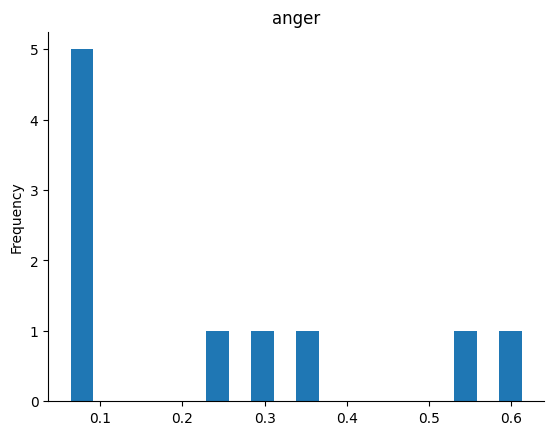

In [17]:
from matplotlib import pyplot as plt
emotions_df['anger'].plot(kind='hist', bins=20, title='anger')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
df = pd.merge(df, emotions_df, on = "isbn13")

In [20]:
df.shape

(10, 21)

In [26]:
df.to_csv("books_with_emotions.csv",index=False)